In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
# load data
train = pd.read_csv('./digit_train.csv')
test = pd.read_csv('./digit_test.csv')

In [3]:
Y_train = train.values[:, 0]
X_train = train.values[:, 1:]
test = test.values[:]

del train

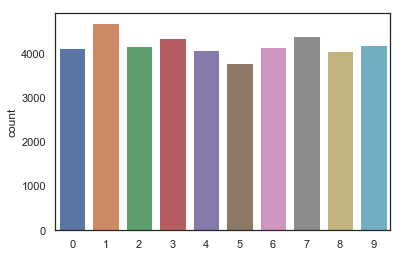

In [4]:
g = sns.countplot(Y_train)

In [5]:
# normalization
X_train = X_train/255.0
test = test/255.0

In [6]:
X_train.shape[0]

42000

In [7]:
# reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
test = test.reshape(test.shape[0], 28, 28, 1)

In [8]:
# label encoding
Y_train = to_categorical(Y_train, num_classes=10)

In [9]:
# split training and validation set
random_seed = 2
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=random_seed)

In [11]:
def train_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Con2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
    datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, zca_whitening=False, rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False)
    
    datagen.fit(X_train)
    
    history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=3000, epochs=30, validation_data=X_test, Y_test), verbose=2, steps_per_epoch=X_train.shape[0]//batch_size, callbacks=[learning_rate_reduction])